# Introduction to our Submission System

In this exercise you will:

- Optional: Learn how to set up Google Colab for our exercises
- Learn how to work with IPython notebooks
- Get a small numpy introduction
- Learn about our submission system

Execute a selected cell with `Shift + Enter`.

# (Optional) Set up Google Colab

If you lack resources CPU or GPU resources to finish an exercise, you can also use your google account to access [google colab](https://colab.research.google.com/) which provides an already set up python environment as well as free resources for training.

In order to use google colab follow these steps:
1. Access your [google drive](https://drive.google.com/) and upload your i2dl folder that contains the respective exercises/datasets etc. in the main directory
<img src="./images/colab_folder.png">
2. Open the exercise folder and select the notebook you want to open in google colab
<img src="./images/colab_start_notebook.png">
3. Uncomment (remove the two '"""'s) and execute the cell below to mount your gdrive folder. You have to allow google colab to access your folder in the pop up box and sign in to your account once more
4. Done, the notebook is now ready to be used with google colab and you can start executing cells from the top of the notebook as desired
<img src="./images/colab_done.png">

## (Optional) Mount folder in Colab

Uncomment thefollowing cell to mount your gdrive if you are using the notebook in google colab:

In [ ]:
"""
from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/i2dl/exercise_01'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Let's test the setup by simply checking if all paths are present
present = True
necessary_paths= ['exercise_code']
files = os.listdir()
for path in necessary_paths:
    if path not in files:
        present = False
if not present:
    print("Can't find all required folders. You either installed the notebook in the wrong path or didn't upload the full exercise folder. You can check your paths in the file overview on the left.")
else:
    print('Google colab setup complete! Mounted folders:')
    print(files)
"""

## 1. IPython Notebooks
An IPython notebook is made up of a number of cells. Each cell can contain Python code. You can execute a cell by clicking on it and pressing `Shift-Enter`. When you do so, the code in the cell will be executed, and the output of the cell will be displayed beneath the cell. For example, after running the first cell the notebook looks like this:

In [1]:
x = 5
print(x+3)

8


Global variables are shared between cells. Therefore, we can access `x` in the next cell.

In [2]:
print(x+10)

15


By convention, IPython notebooks are expected to be run from top to bottom. Failing to execute some cells or executing cells out of order can result in errors:

In [5]:
# This does not work
print(x+y)

8


In [4]:
# After executing this cell, you can re-evaluate the cell above
y = 3

You can edit cells by double clicking them (the color on the left changes from blue to green) and change the text (not really useful) or code (will be useful).

In [6]:
print('I have not changed the cell')

I have not changed the cell


Please make sure that you are using the correct python environment. You can print out the environment path with the following cell. If you use python2 to work on the exercises and submit your model, you will encounter errors.

In [7]:
import sys
print(sys.version)
if sys.version_info <= (3, 7):
    print("you are using an older version of python. We expect python 3.7.x \nYou can continue with your version but it might cause some issues")

3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]


After you have modified an IPython notebook for one of the assignments by modifying or executing some of its cells, remember to __save your changes__!


## 2. Imports

We start every notebook with a cell containg the important imports. So the first cell of every notebook is the import cell, as this needs to be executed before running any code.


In [8]:
import time
import os
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# 3. Numpy Introduction

Numpy is a high performance framework for operations on multi dimensional arrays. It would be a nice tool in your kitty for working on later exercises and your life as a Data Scientist in general. 

In [9]:
# Create a simple (2, 3) numpy array
# [[ 1  2  3]
#  [ 4  5  6]]
a = np.array([[1,2,3], [4,5,6]])

# Print the data type of this array
print(a.dtype)

# print the shape of this array
print(a.shape)

int32
(2, 3)


In [10]:
# Slicing operation 
# Let us take the first two columns from the original array and save it in a new one
b = a[:, :2]
print(b)
print(b.shape)

[[1 2]
 [4 5]]
(2, 2)


In [11]:
# Select elements which satisfy a condition
# Using numpy array makes such a selection trivial
mask = a > 1
new_array = a[mask]
new_array

array([2, 3, 4, 5, 6])

In [12]:
# Do the same thing in a single step
c = a[a>1]
assert np.all(new_array == c) #  np.all() to indicate that all the values need to match

In [13]:
# Mathematical operations
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[ 6  8]
 [10 12]]
[[ 6  8]
 [10 12]]
[[-4 -4]
 [-4 -4]]
[[-4 -4]
 [-4 -4]]
[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [14]:
# Element wise operations
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

# Element wise exponential operation
#[[ 2.71828183  7.3890561 ]
#  [20.08553692 54.59815003]] 
print(np.exp(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]
[[ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]


A detailed summary of numpy is beyond the scope of this assignment. Please take a look at http://docs.scipy.org/doc/numpy/reference/ for further reference. For this exercise, the tasks we have covered should be enough.

## 4. Notebook convenience
One of the convenient things about jupyter notebooks is the ability to display images, instructions and guide your thought process. You will not have any new clanky windows opening up and everything shall be inline.

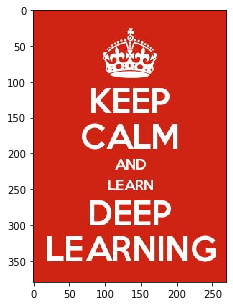

In [15]:
# Load the image first
image = Image.open('images/sample_image.jpg')
plt.imshow(image)

<div class="alert alert-info">
    <h3>Inline Question</h3>
    <p>Sometimes we ask inline questions. They should help you to think about the subject that are relevant for the exam.</p>
    <p>**Your answer:** You can write your answer here to save it in the ipython notebook so you can review it before the exam. Double click a cell to edit it and enter your answer.</p>
</div>

## 5. External Files
Most of your work will involve implementing certain functions in external python files. You can either open external files here in jupter notebook or edit them with your favourite text or python editor.

All files you will have to edit are contained in the `exercise_code` folder. Check out the `Dummy` class in `exercise_code/networks/dummy.py`.

In [18]:
from exercise_code.networks.dummy import Dummy
# Instantiate a "model"
model = Dummy()

## 6. Dummy Machine

Usually, we ask you to train and submit models. You don't need to train anything fancy in this exercise, this is just a sample code to familarize you with the file structure and your future tasks.

You need to make some changes to the `forward()` method in `exercise_01/exercise_code/networks/dummy.py`and set `x` to any integer that is larger than 59. We highlight all locations where you should modify the code with boxes in the respective files.

<div class="alert alert-danger">
    <h3>Warning: Don't modify code outside your assigned boxes</h3>
    <p>Make sure that you don't mutate, rename or remove classes or functions outside the respective assigned boxes!</p><p> You can add new functions if you so desire and feel the need of having them structured outside of our respective boxes but besides later exercises these shouldn't be required.</p>
</div>

In this submission you get a score depending upon the number of test cases you pass. Usually, the total points you can secure is between __0 - 100__. For this exercise, you have __one test cases__ which depends on the output of the `forward()` function. You can check the `exercise_01/exercise_code/tests` folder to have a general feel about the unit tests. Please remember that these test cases are just a sample and the submission server has a set of different test cases. 

In [19]:
from exercise_code.tests.dummy_tests import DummyTest

test_cases = DummyTest(model)
test_cases()

DummyTest passed.
The score of your dummy machine is: 100


## 7. Model Saving
Now you need to save the model. We provide you with all the functionality, so you will only need to execute the next cell.

In [20]:
model.save_model()

<div class="alert alert-danger">
    <h3>Warning</h3>
    <p>You might get an error like this:</p>
    <p>PicklingError: Can't pickle `<class 'exercise_code.test_model.TestModel'>`: it's not the same object as exercise_code.test_class.TestSubmission</p>
    <p>The reason is that we are using autoreload and working on this class during the notebook session. If you get this error simply restart the kernel and rerun the whole script (Kernel -> Restart & Run All) or only the important cells for generating your model.</p>
</div>

## 8. Zip File Creation
Run the following cell to create the zip file for submission, which contains all the exercise code, models, and ipynb notebooks.

In [21]:
from exercise_code.submit import submit_exercise

submit_exercise('../output/exercise1')

relevant folders: ['exercise_code', 'models']
notebooks files: ['1_introduction.ipynb']
Adding folder exercise_code
Adding folder models
Adding notebook 1_introduction.ipynb
Zipping successful! Zip is stored under: C:\Users\xshys\Desktop\2022SS\I2dl\Exercise\i2dl\output\exercise1.zip


# Submission Goals

- Goal: implement dummy machine 
- Threshold to this exercise: 60
- Submission start: __now__.
- Submission deadline: __16.05.22, 23:59__. 
- You can make multiple submission until the deadline. Your __best submission__ will be shown on the website. This submission will not count towards the bonus.

# Submission Instructions

Now, that you have completed the necessary parts in the notebook, you can go on and submit your files.

1. Go on [our submission page](https://i2dl.dvl.in.tum.de/), register for an account and login. We use your matriculation number and send an email with the login details to the mail account associated. When in doubt, login into tum-online and check your mails there. You will get an id which we need in the next step. If you are an external student, please contact us directly via the mailing list so that we can issue you a personal account since the automatic registration uses the TUM native matriculation numbers for registration.
2. Log into [our submission page](https://i2dl.dvl.in.tum.de/) with your account details and upload the zip file.
3. Your submission will be evaluated by our system and you will get feedback about the current progress and performance of it. You will get an email with your score as well as a message if you have surpassed the threshold.
4. Within the working period, you can submit as many solutions as you want to get the best possible score. Once the submission closes up, you can no longer submit any newer models for graded evaluation.

<img src="./images/i2dlsubmission.png">

## References
Congratulations!! You have finished the introductory notebook.
Some references to learn how to use basic python libraries (Numpy, Scipy and Matplotlib) that you would need for this course:

[1] https://docs.python.org/3/tutorial/

[2] http://cs231n.github.io/python-numpy-tutorial/

# [Exercise Review](https://docs.google.com/forms/d/e/1FAIpQLScwZArz6ogLqBEj--ItB6unKcv0u9gWLj8bspeiATrDnFH9hA/viewform)

We are always interested in your opinion. Now that you have finished this exercise, we would like you to give us some feedback about the time required to finish the submission and/or work through the notebooks. Please take the short time to fill out our [review form](https://docs.google.com/forms/d/e/1FAIpQLScwZArz6ogLqBEj--ItB6unKcv0u9gWLj8bspeiATrDnFH9hA/viewform) for this exercise so that we can do better next time! :)